#References
https://arxiv.org/pdf/1704.05579.pdf - Literature on sarcasm detection

https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3384025 - Literature on sarcasm detection

https://pythonguides.com/matplotlib-3d-scatter/ - How to create a 3D plot using matplotlib

https://sparkbyexamples.com/pandas/normalize-columns-of-pandas-dataframe/ - How to normalize a dataframe

https://nlp.stanford.edu/seminar/details/pbhattacharyya.pdf - Literature on sarcasm detection

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html - PCA documentation

https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html - TSNE documentation

https://analyticsindiamag.com/how-do-kernels-learn-non-linear-functions/ - Understand non-linear transform

https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk - List of NLTK POS tags

https://towardsdatascience.com/pca-lda-and-svd-model-tuning-through-feature-reduction-for-transportation-poi-classification-8d20501ee255 - How to implement dimensionality reduction

#Init

In [ ]:
!pip install -U matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
data_path = "/content/drive/My Drive/Colab Notebooks/train-balanced-sarcasm.csv"

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np 
import pandas as pd

In [ ]:
datastore = pd.read_csv(data_path)
datastore = datastore.dropna()
datastore.reset_index(drop=True, inplace=True)

In [ ]:
clean_df = datastore[:10000].copy()
# clean_df = datastore.copy()

In [ ]:
clean_df = clean_df.drop(['created_utc', 'date', 'author', 'subreddit', 'score', 'ups', 'downs', 'parent_comment'], axis=1)

In [ ]:
clean_df.head()

,label,comment
0,0,NC and NH.
1,0,You do know west teams play against west teams...
2,0,"They were underdogs earlier today, but since G..."
3,0,"This meme isn't funny none of the ""new york ni..."
4,0,I could use one of those tools.


In [ ]:
labels = clean_df["label"]
clean_df = clean_df.drop(["label"], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
train_comment, test_comment, Y_train, Y_test = train_test_split(clean_df, labels, test_size=0.2, random_state=42)
train_comment.reset_index(drop=True, inplace=True)
test_comment.reset_index(drop=True, inplace=True)
Y_train.reset_index(drop=True, inplace=True)
Y_test.reset_index(drop=True, inplace=True)

In [ ]:
#Get features from train_comment => X_train
#Get features from test_comment => X_test

In [ ]:
import string

def alphabet_rep(text):
  count = 0
  letter = text[0]
  for i in text:
    if count > 2 :
      return 1 #True
    if i == letter:
      count += 1
    else:
      count = 0
      letter = i
  return 0 #False

def exclamation_freq(text):
  count = 0
  for i in text:
    if i == "!":
      count += 1
  freq = count/len(text)
  return freq

def question_freq(text):
  count = 0
  for i in text:
    if i == "?":
      count += 1
  freq = count/len(text)
  return freq

def dots_freq(text):
  count = 0
  for i in text:
    if i == ".":
      count += 1
  freq = count/len(text)
  return freq

def caps_freq(text):
  count = 0
  for i in text:
    if i.isupper():
      count += 1
  return count/len(text)

def quotes_freq(text):
  count = 0
  for i in text:
    if i in  ("\'" ,"\""):
      count += 1
  freq = count/len(text)
  return freq

def consecutive_caps(text):
  n = len(text)
  count = 0
  for i in range(n):
    if (i < n - 1 and text[i].isupper() and text[i+1].isupper()):
      if i == 0 and text[i].isupper():
        count += 1
      if i > 0 and not text[i - 1].isupper():
        count += 1
      count += 1
  
  return count

def consecutive_dots(text):
  n = len(text)
  count = 0
  for i in range(n):
    if (i < n - 1 and text[i] == "." and text[i+1] == "."):
      if i == 0 and text[i] == ".":
        count += 1
      if i > 0 and not text[i - 1] == ".":
        count += 1
      count += 1
  
  return count

def consecutive_exclamations(text):
  n = len(text)
  count = 0
  for i in range(n):
    if (i < n - 1 and text[i] == "!" and text[i+1] == "!"):
      if i == 0 and text[i] == "!":
        count += 1
      if i > 0 and not text[i - 1] == "!":
        count += 1
      count += 1
  
  return count

def consecutive_question(text):
  n = len(text)
  count = 0
  for i in range(n):
    if (i < n - 1 and text[i] == "?" and text[i+1] == "?"):
      if i == 0 and text[i] == "?":
        count += 1
      if i > 0 and not text[i - 1] == "?":
        count += 1
      count += 1

  return count

def consecutive_punctuations(text):
  n = len(text)
  count = 0
  for i in range(n):
    if (i < n - 1 and text[i] in string.punctuation and text[i+1] in string.punctuation):
      if i == 0 and text[i] in string.punctuation:
        count += 1
      if i > 0 and not text[i - 1] in string.punctuation:
        count += 1
      count += 1

  return count

In [ ]:
def add_new_features(df, col_name=""):
  df_copy = df.copy()
  df_copy["alphabet"] = df[col_name].apply(lambda x: alphabet_rep(x))
  df_copy["exclamation"] = df[col_name].apply(lambda x: exclamation_freq(x))
  df_copy["dots"] = df[col_name].apply(lambda x: dots_freq(x))
  df_copy["question"] = df[col_name].apply(lambda x: question_freq(x))
  df_copy["caps"] = df[col_name].apply(lambda x: caps_freq(x))
  df_copy["quotes"] = df[col_name].apply(lambda x: quotes_freq(x))


  df_copy["consecutive_caps"] = df[col_name].apply(lambda x: consecutive_caps(x))

  # df_copy["consecutive_dots"] = df[col_name].apply(lambda x: consecutive_dots(x))

  df_copy["consecutive_exclamations"] = df[col_name].apply(lambda x: consecutive_exclamations(x))
  df_copy["consecutive_question"] = df[col_name].apply(lambda x: consecutive_question(x))
  df_copy["consecutive_punctuations"] = df[col_name].apply(lambda x: consecutive_punctuations(x))

  df_copy = df_copy.fillna(0)
  return df_copy

In [ ]:
X_train = add_new_features(train_comment, "comment")
X_train.head()

,comment,alphabet,exclamation,dots,question,caps,quotes,consecutive_caps,consecutive_exclamations,consecutive_question,consecutive_punctuations
0,Ikea Bekant in black.,0,0.0,0.047619,0.0,0.095238,0.000000,0,0,0,0
1,I don't think hes saying it's right he's just ...,0,0.0,0.006098,0.0,0.006098,0.018293,0,0,0,0
2,"yep, pretty fucking frustrating.",0,0.0,0.031250,0.0,0.000000,0.000000,0,0,0,0
3,He's an assn....,0,0.0,0.250000,0.0,0.062500,0.062500,0,0,0,4
4,I think you forgot your,0,0.0,0.000000,0.0,0.043478,0.000000,0,0,0,0


In [ ]:
#PCA on X_train
component_count = 2

In [ ]:
from sklearn.decomposition import PCA
#
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#
from google.colab import output
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_pca(features, labels, comp=3):
  pca = PCA(n_components=comp)#TSNE(n_components=comp, learning_rate='auto', init='random') #LinearDiscriminantAnalysis(n_components=1, solver='svd') #
  X_pca = pca.fit_transform(features, labels)

  cols = [["PC" + str(i) for i in range(1, comp+1)]]
  pca_df = pd.DataFrame(data = X_pca, columns = cols)
  pca_df['labels'] = np.array(labels)

  %matplotlib widget
  output.enable_custom_widget_manager()


  fig = plt.figure(figsize=(40, 40))
  # fig = plt.figure()
  ax = fig.add_subplot()
  ax.set_xticks(np.arange(0, 20, step=5))
  ax.set_yticks(np.arange(0, 100, step=5))
  # ax = Axes3D(fig)
  colors = list(labels)

  for i in range(len(colors)):
    if colors[i] == 0:
      colors[i] = "blue"
    else:
      colors[i] = "red"

  # pc3 = pd.Series( np.sqrt(2) * np.array(pca_df["PC1"]).reshape(-1) * np.array(pca_df["PC2"]).reshape(-1))
  # pc3 = pd.Series(np.array(pca_df["PC1"]).reshape(-1) * np.array(pca_df["PC2"]).reshape(-1))
  # pca_df["PC3"] = pc3

  # ax.scatter(np.square(pca_df["PC1"]), np.square(pca_df["PC2"]), pca_df["PC3"], c=colors)
  # ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"], c=colors)
  ax.scatter(pca_df["PC1"], pca_df["PC2"], c=colors)
  # ax.scatter(pca_df["PC1"], np.zeros(len(pca_df["PC1"])), c=colors)

  curr_size = plt.gcf().get_size_inches()
  upscale = 1
  plt.gcf().set_size_inches(upscale*curr_size)

  return pca_df

In [ ]:
#Normalize columns of X_train before PCA
# norm_X_train = X_train.drop(["comment", "tokenized_words"], axis=1)
norm_X_train = X_train.drop(["comment"], axis=1)
norm_X_train = norm_X_train.astype(float)
norm_X_train = (norm_X_train - norm_X_train.mean()) / norm_X_train.std()
norm_X_train = norm_X_train.fillna(0)

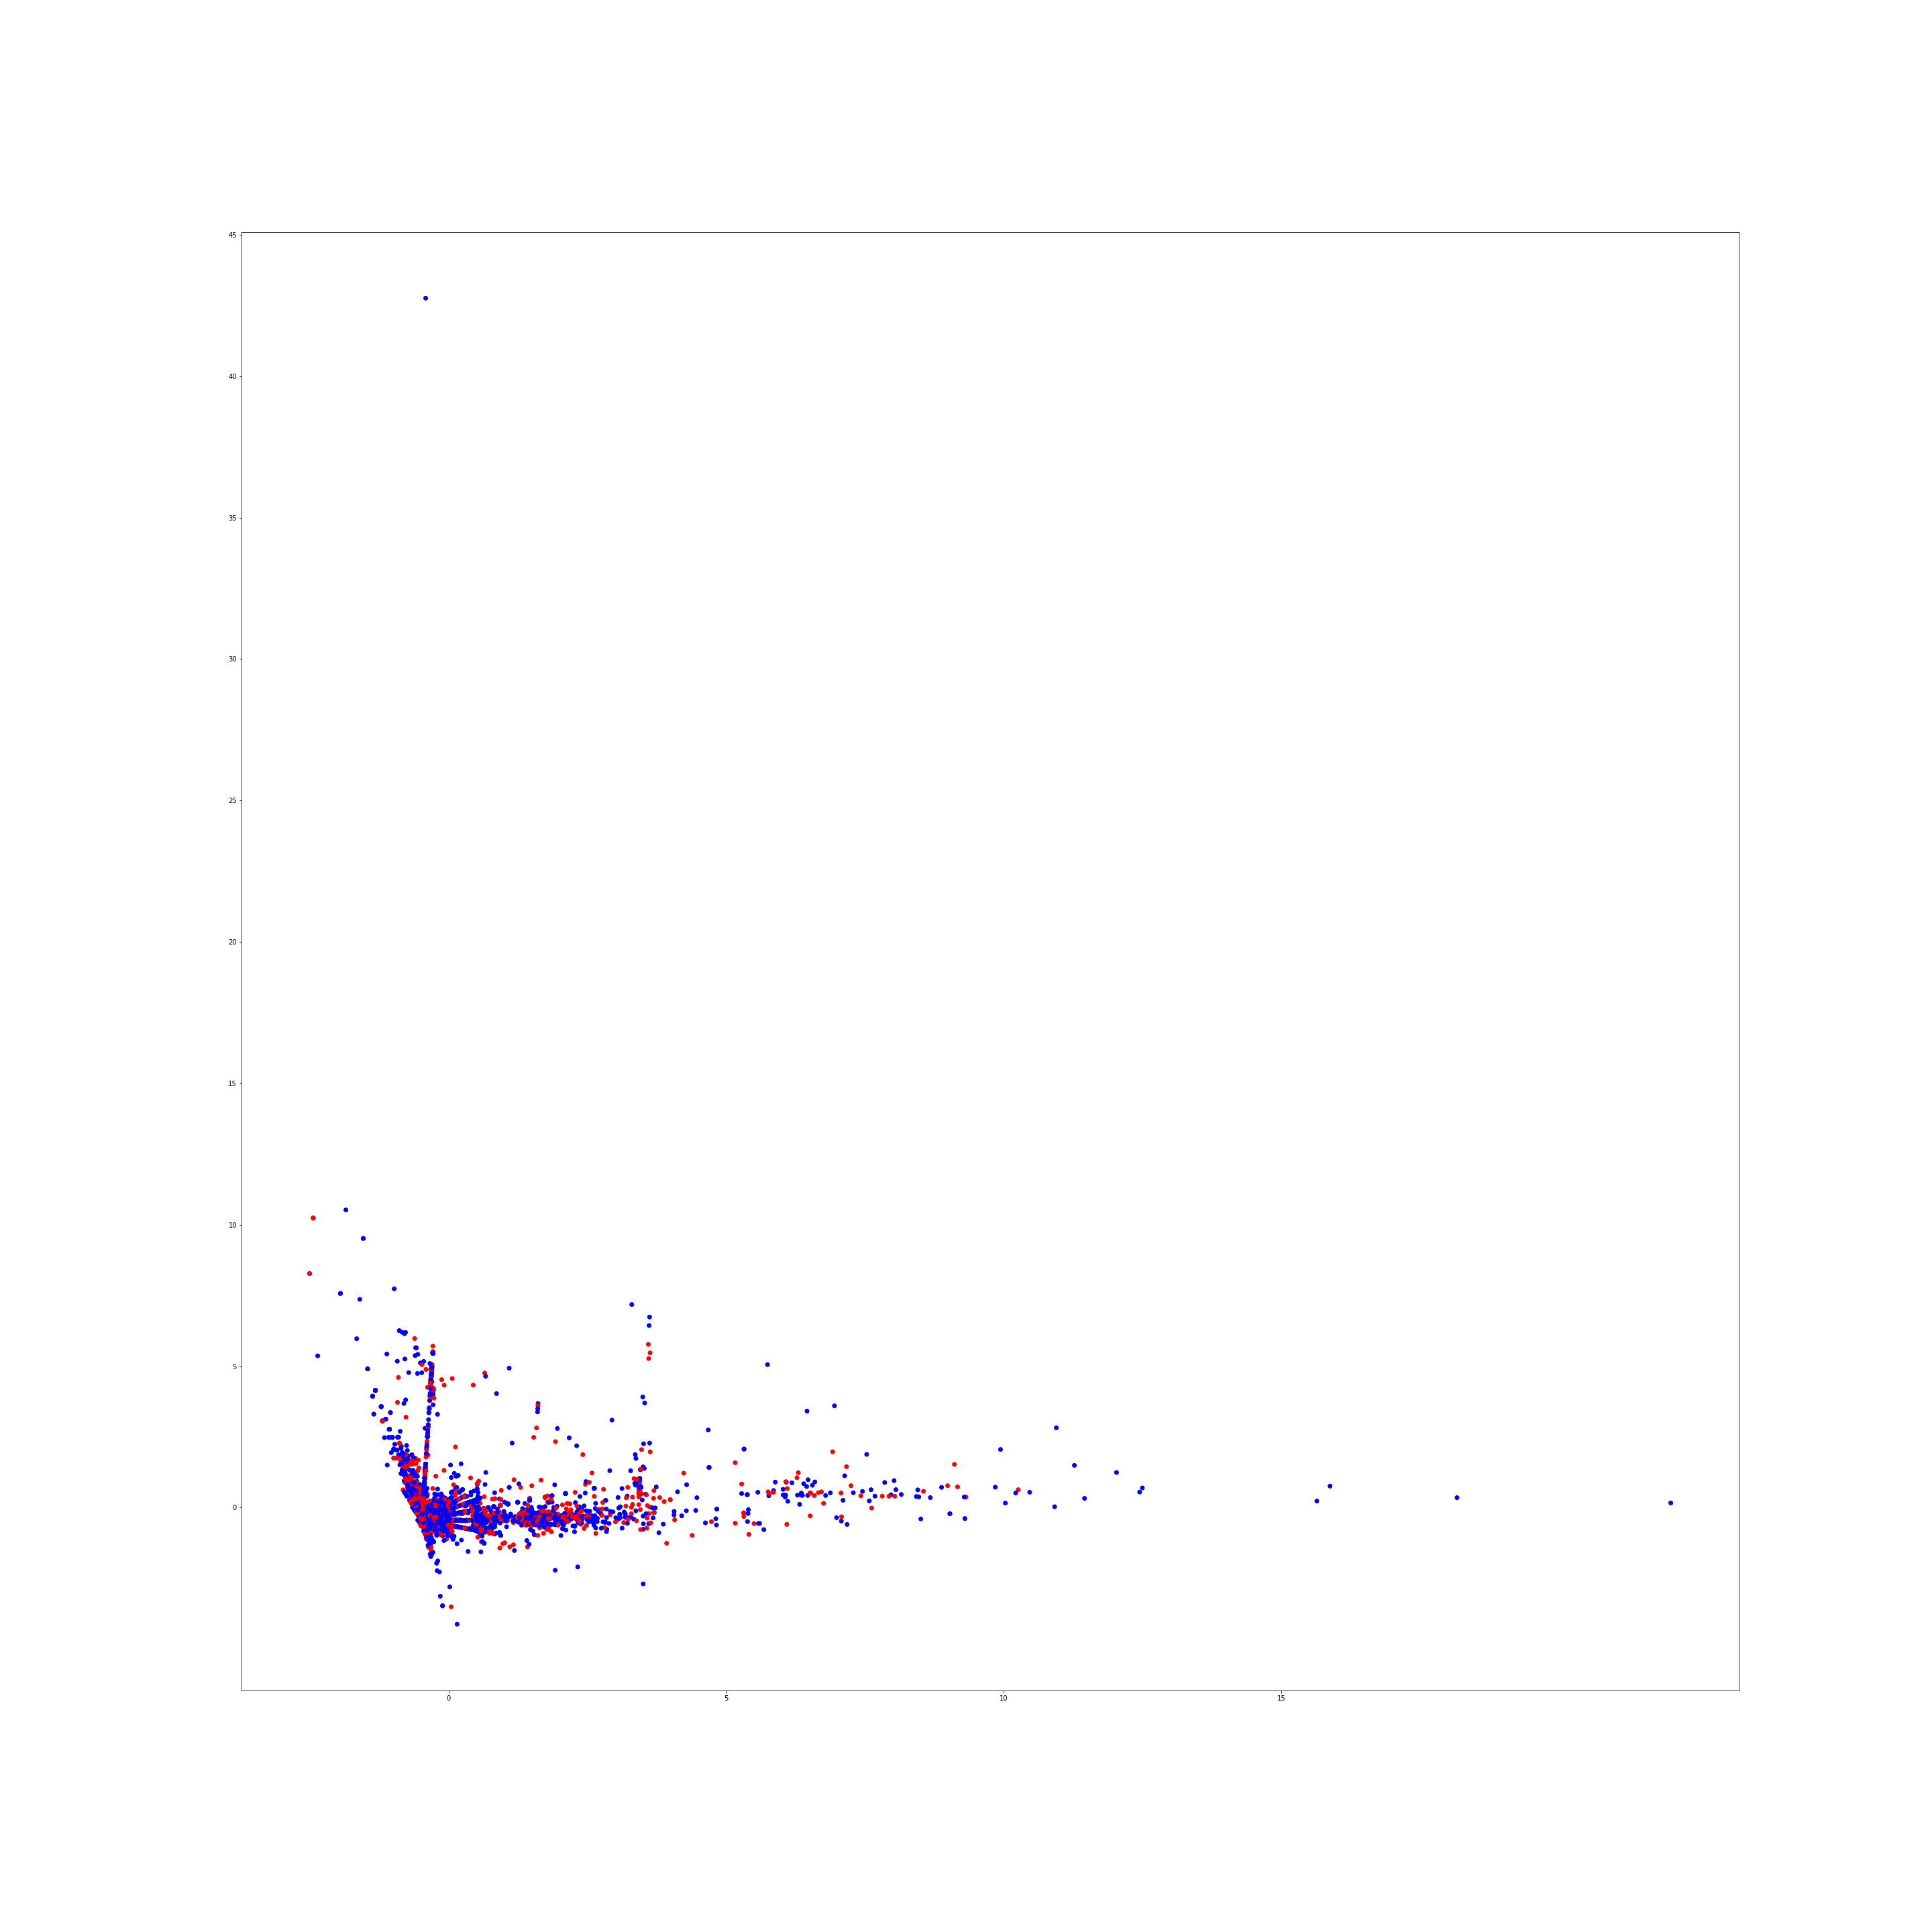

In [ ]:
pca_df = plot_pca(norm_X_train, Y_train, comp=component_count)

In [ ]:
pca_df.head(10)

,PC1,PC2,labels
0,0.270612,0.119003,0
1,-0.355719,-0.613842,0
2,0.001153,-0.435340,0
3,5.409745,-0.945278,1
4,-0.468810,-0.169332,1
5,-0.471586,-0.252015,1
6,-0.184735,-0.320296,0
7,-0.655321,0.448231,0
8,2.107726,0.499085,0
9,-1.152261,2.476309,0
